In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat

import os
import shutil
import random

In [ ]:
folder_path = os.path.dirname(os.path.dirname(os.getcwd()))
folder_path

In [165]:
directory_path_labels = r''+folder_path+r'\NewImages\DrishtiLabels\annotations-ONH-ground truth'
targer_dir_path_labels = r''+folder_path+r'\Data\Labels'
filenames_labels = os.listdir(directory_path_labels)
filenames_labels_target = os.listdir(targer_dir_path_labels)

In [166]:
directory_path_images = r''+folder_path+r'\NewImages\DrishtiImages\images'
targer_dir_path_images = r''+folder_path+r'\Data\Images'
filenames_images = os.listdir(directory_path_images)
filenames_images_target = os.listdir(targer_dir_path_images)

In [167]:
last_num_image = int(filenames_images_target[-1].strip(".jpg"))
last_num_label = int(filenames_labels_target[-1].strip(".mat"))
print(last_num_image)
print(last_num_label)

650
650


In [168]:
filenames_images[0].strip('drishtiGS_').strip('.png')

'001'

In [169]:
for filename_img, filename_lab in zip(filenames_images, filenames_labels):
    last_num_image+=1
    last_num_label+=1
    
    src_image = directory_path_images +'\/'+ filename_img
    trg_image = targer_dir_path_images + '\/' + str(last_num_image) + '.jpg'

    src_label = directory_path_labels +'\/'+ filename_lab
    trg_label = targer_dir_path_labels + '\/' + str(last_num_label) + '.mat'

    image = cv2.imread(src_image)
    label = cv2.imread(src_label)

    label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
    
    label[label==0] = 3
    label[label==2] = 5
    
    label[label==3] = 2
    label[label==5] = 0

    cv2.imwrite(trg_image, image)
    savemat(trg_label, {'mask':label})

In [189]:
mat01 = cv2.imread(r''+folder_path+r'\NewImages\DrishtiLabels\annotations-ONH-ground truth\drishtiGS_100.png')#loadmat(r''+folder_path+r'\Data\Labels\750.mat', variable_names='mask').get('mask')
mat02 = loadmat(r''+folder_path+r'\Data\Labels\682.mat', variable_names='mask').get('mask')
image = Image.open(r''+folder_path+r'\Data\Images\682.jpg')

In [157]:
mat01 = cv2.cvtColor(mat01, cv2.COLOR_BGR2GRAY)

In [158]:
mat01.shape

(1749, 2049)

In [159]:
    mat01[mat01==0] = 3
    mat01[mat01==2] = 5
    
    mat01[mat01==3] = 2
    mat01[mat01==5] = 0

In [160]:
unique_values, counts = np.unique(mat01, return_counts=True)

In [161]:
for value, count in zip(unique_values, counts):
    print(str(value) +":    "+str(count))

0:    3483098
1:    87032
2:    13571


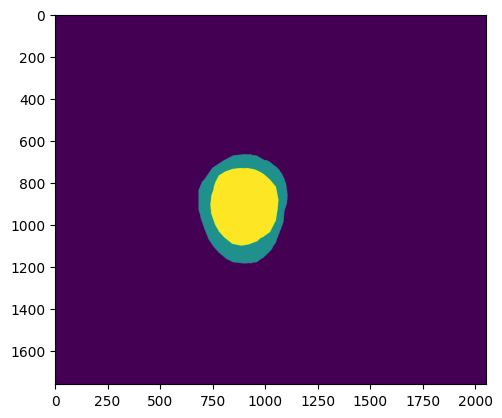

In [190]:
plt.imshow(mat02)

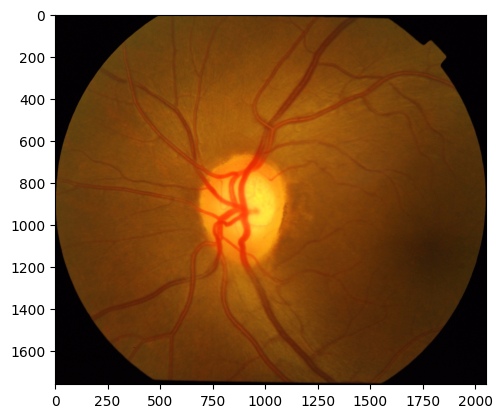

In [191]:
plt.imshow(image)